# Focos de Calor - Incêndios Florestais de 1998 - 2020

Base extraída do site de dados públicos do INPE: http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/

Tutoriais para aprendizado do ARIMA : 
- https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/
- https://ichi.pro/pt/previsao-de-temperatura-com-modelo-arima-em-python-73096807304019
- https://github.com/minerandodados/mdrepo/blob/164cf328d0e007de260666d75a84bbf76defd2c3/Arima-Tutorial.ipynb
- https://github.com/IvanildoBatista/Series-Temporais/blob/master/AutoARIMA/Aplicando%20AutoARIMA%20em%20Python.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13,5)

import plotly.offline as py
import plotly.graph_objs as go

#Função para mostrar o gráfico no notebook
py.init_notebook_mode(connected=True)

In [2]:
from datetime import datetime

def transform_data (year, month):
    months = {
        'Janeiro' : '01',
        'Fevereiro' : '02',
        'Março': '03',
        'Abril': '04',
        'Maio': '05',
        'Junho': '06',
        'Julho': '07',
        'Agosto': '08',
        'Setembro': '09',
        'Outubro': '10',
        'Novembro': '11',
        'Dezembro': '12'
    }
    
    data = datetime.strptime(str(year) + '-' + months[month] + '-01', '%Y-%m-%d')
    
    return data

In [3]:
transform_data(2020, 'Janeiro')

datetime.datetime(2020, 1, 1, 0, 0)

In [4]:
archive = 'base_completa_foco_calor.csv'

base = pd.read_csv(archive)
#base['date'] = pd.to_datetime(base.date)
base

,year,number,month,state
0,1998,0,Janeiro,Acre
1,1999,0,Janeiro,Acre
2,2000,0,Janeiro,Acre
3,2001,0,Janeiro,Acre
4,2002,0,Janeiro,Acre
...,...,...,...,...
7759,2017,81,Dezembro,Tocantins
7760,2018,166,Dezembro,Tocantins
7761,2019,219,Dezembro,Tocantins
7762,2020,211,Dezembro,Tocantins


In [5]:
# Retirada dos dados de 2021
base = base[base['year'] < 2021].reset_index(drop=True)

In [6]:
base['data'] =  base.apply(lambda x: transform_data(x.year, x.month), axis=1)

In [7]:
base['data']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
7447   2016-12-01
7448   2017-12-01
7449   2018-12-01
7450   2019-12-01
7451   2020-12-01
Name: data, Length: 7452, dtype: datetime64[ns]

In [8]:
base.tail(5)

,year,number,month,state,data
7447,2016,115,Dezembro,Tocantins,2016-12-01
7448,2017,81,Dezembro,Tocantins,2017-12-01
7449,2018,166,Dezembro,Tocantins,2018-12-01
7450,2019,219,Dezembro,Tocantins,2019-12-01
7451,2020,211,Dezembro,Tocantins,2020-12-01


In [9]:
# Informações sobre os dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    7452 non-null   int64         
 1   number  7452 non-null   int64         
 2   month   7452 non-null   object        
 3   state   7452 non-null   object        
 4   data    7452 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 291.2+ KB


In [10]:
base.describe()

,year,number
count,7452.000000,7452.000000
mean,2009.000000,681.952630
std,6.633695,1968.740691
min,1998.000000,0.000000
25%,2003.000000,12.000000
50%,2009.000000,76.000000
75%,2015.000000,395.250000
max,2020.000000,37231.000000


In [11]:
base['number'].max()

37231

In [12]:
# Função para Série Temporal

def plot_forest_fires_timeline(df, title_graph):
    
    dataTemp = df.groupby(['year']).agg({'number': 'sum'}).reset_index()
    
    dataTemp['3-years-SMA'] = dataTemp['number'].rolling(window=3).mean()
    
    graph = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    mode = 'markers+lines+text',
                    name = 'Focos de Calor',
                    textposition= 'top center'
                    )
    
    graph_sma = go.Scatter(x = dataTemp['year'],
                    y = dataTemp['3-years-SMA'],
                    mode = 'markers+lines',
                    name = 'Média Móvel do Triênio'
                    )
    
    data = [graph, graph_sma]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Ano'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=450, 
                      width=1000,
                      legend=dict(
                        yanchor="top",
                        y= 0.95,
                        xanchor="right",
                        x=0.98,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)
    

In [13]:
plot_forest_fires_timeline(base, 'Série Temporal dos Focos de Calor')

In [14]:
# Função para Gráfico de Barras

def plot_forest_fires_state(df, title_graph, modeGraphBar):
    
    dataTemp = df.groupby(['state']).agg({'number': 'sum'}).sort_values(
        by=['state']).reset_index()
    
    if modeGraphBar:
        graph = go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    else:
        graph = go.Scatter(x = dataTemp['state'],
                    y = dataTemp['number'],
                    mode = 'markers',
                    marker=dict(
                        size=dataTemp['number']/100,
                        sizemode='area',
                        color='rgb(255, 65, 54)',
                        sizemin=4,
                        line_width=2
                        )
                    )    
    
    data = [graph]

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [15]:
plot_forest_fires_state(base, 'Número de Focos de Calor por Estado', True)

In [16]:
# Função para Gráfico de Barras

def plot_forest_fires_month(df):
    
    dataTemp = df.groupby(['month']).agg({'number': 'sum'}).sort_values(
        by=['number'], ascending=False).reset_index()
    
    
    graph = go.Bar(x = dataTemp['month'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto'
                    )
    
    
    data = [graph]

    layout = go.Layout(title = 'Número de Focos de Calor por Mês',
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=900)
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [17]:
plot_forest_fires_month(base)

In [18]:
# Histograma dos focos de calor

def plot_histogram(df):

    graph = go.Histogram(x=df['number']) 

                          
    data = [graph]
    
    layout = go.Layout(title = 'Histograma dos Números de Focos de Calor',
                   xaxis = {'title': 'Distribuição'},
                   yaxis = {'title': 'Frequência'})
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [19]:
plot_histogram(base)

In [20]:
# Boxplot do número de focos de calor

def plot_box_plot(df):
    
    graph = go.Box(y = df[df['state'] == 'Mato Grosso']['number'],
                name = 'Mato Grosso')
    
    graph1 = go.Box(y = df[df['state'] == 'Pará']['number'],
                name = 'Pará')
    
    graph2 = go.Box(y = df[df['state'] == 'Maranhão']['number'],
                name = 'Maranhão')
    
    data = [graph, graph1, graph2]
    
    layout = go.Layout(title = 'BoxPlot dos Números de Focos de Calor',
                      height=600, 
                      width=1000)
    
    fig = go.Figure(data=data, layout=layout)
    return py.iplot(fig)

In [21]:
plot_box_plot(base)

In [22]:
# Série Temporal dos Focos de Calor - Mato Grosso
base_temp = base.loc[base['state'] == 'Mato Grosso']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Mato Grosso')

In [23]:
# Série Temporal dos Focos de Calor - Pará
base_temp = base.loc[base['state'] == 'Pará']
plot_forest_fires_timeline(base_temp, 'Série Temporal dos Focos de Calor - Pará')

In [24]:
#Bubble Chart do Número de Focos de Calor por Estado - Setembro
base_temp = base.loc[base['month'] == 'Setembro']
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - Setembro', False)

In [25]:
# Função para Gráfico de Barras

def plot_forest_fires_state_max_month(df, months, title_graph):
    
    data = []
    
    for month in months:
        dataTemp = df[df['month'] == month].groupby(['state']).agg(
            {'number': 'sum'}).nlargest(3, 'number').reset_index()
    
    
        graph= go.Bar(x = dataTemp['state'],
                    y = dataTemp['number'],
                    text = dataTemp['number'],
                    textposition='auto',
                    name = month
                    )
    
    
        data.append(graph)
        

    layout = go.Layout(title = title_graph,
                      xaxis = {'title': 'Estado'},
                      yaxis = {'title': 'Número de Focos de Calor'},
                      height=600, 
                      width=1000,
                      legend=dict(
                        yanchor='top',
                        y=0.98,
                        xanchor='right',
                        x=0.99,
                        bgcolor='rgba(255, 255, 255, 0)'
                      ))
            
    fig = go.Figure(data=data, layout=layout)
    
    return py.iplot(fig)

In [26]:
# Gráfico de barras dos Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro
title = 'Estados com Maiores Focos de Calor em Agosto, Setembro e Outubro'
plot_forest_fires_state_max_month(base, ['Agosto', 'Setembro', 'Outubro'], title )

In [27]:
#Bubble Chart do Número de Focos de Calor por Estado - 2020
base_temp = base.loc[base['year'] == 2020]
plot_forest_fires_state(base_temp, 'Número de Focos de Calor por Estado - 2020', False)

# Datasets Pará, Minas Gerais e Maranhão

In [28]:
base_PA = base[base['state'] == 'Pará']
base_PA.set_index('data', inplace = True)
base_PA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Pará
1999-01-01,1999,87,Janeiro,Pará
2000-01-01,2000,30,Janeiro,Pará
2001-01-01,2001,34,Janeiro,Pará
2002-01-01,2002,144,Janeiro,Pará
...,...,...,...,...
2016-12-01,2016,3051,Dezembro,Pará
2017-12-01,2017,4879,Dezembro,Pará
2018-12-01,2018,1005,Dezembro,Pará


In [29]:
base_MG = base[base['state'] == 'Minas Gerais']
base_MG.set_index('data', inplace = True)
base_MG

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Minas Gerais
1999-01-01,1999,36,Janeiro,Minas Gerais
2000-01-01,2000,24,Janeiro,Minas Gerais
2001-01-01,2001,18,Janeiro,Minas Gerais
2002-01-01,2002,29,Janeiro,Minas Gerais
...,...,...,...,...
2016-12-01,2016,90,Dezembro,Minas Gerais
2017-12-01,2017,61,Dezembro,Minas Gerais
2018-12-01,2018,92,Dezembro,Minas Gerais


In [30]:
base_MA = base[base['state'] == 'Maranhão']
base_MA.set_index('data', inplace = True)
base_MA

,year,number,month,state
data,,,,
1998-01-01,1998,0,Janeiro,Maranhão
1999-01-01,1999,54,Janeiro,Maranhão
2000-01-01,2000,19,Janeiro,Maranhão
2001-01-01,2001,29,Janeiro,Maranhão
2002-01-01,2002,49,Janeiro,Maranhão
...,...,...,...,...
2016-12-01,2016,1491,Dezembro,Maranhão
2017-12-01,2017,2970,Dezembro,Maranhão
2018-12-01,2018,904,Dezembro,Maranhão


In [32]:
base_PA = base_PA.asfreq(freq='MS')
base_MG = base_MG.asfreq(freq='MS')
base_MA = base_MA.asfreq(freq='MS')

## Verificando Estacionariedade

**Dickey-Fuller** teste: esse é um dos testes estatísticos para verificar Estacionaridade. Aqui, a hipótese nula é que o TS é não-estacionária. Os resultados do teste são compostos por uma estatística de teste e alguns valores críticos para os níveis de confiança da diferença. Se o ‘teste estatístico’ é menor do que o “valor crítico”, podemos rejeitar a hipótese nula e dizer que a série é estacionária.

- Caso p-value > 0.05: Série não é estacionária e deve ser manipulada.
- Caso p-value <= 0.05: Série é estacionária e a predição pode ser realizada.

In [33]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF','P-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

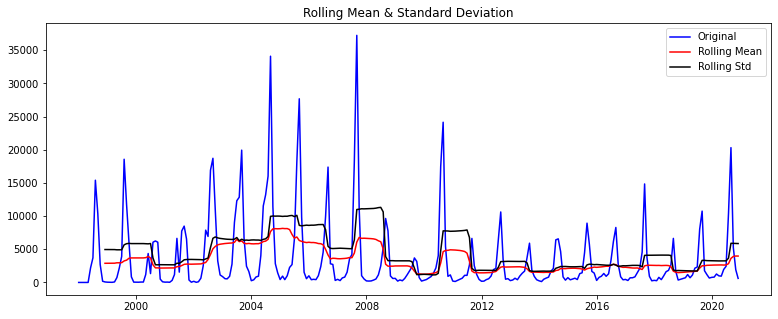

Results of Dickey-Fuller Test:
ADF                             -2.636124
P-value                          0.085759
#Lags Used                      14.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


In [168]:
#Testando se os dados de treino são estacionários - Pará
test_stationarity(base_PA['number'])

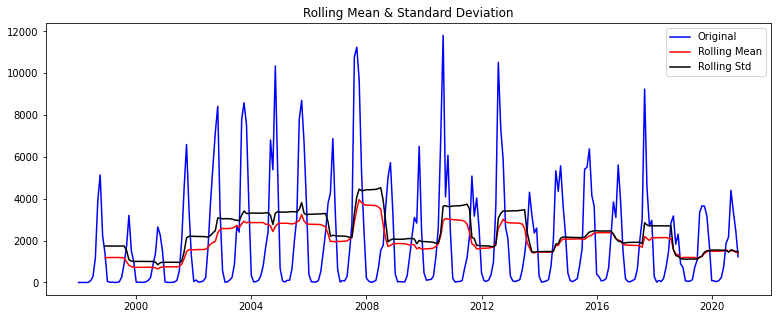

Results of Dickey-Fuller Test:
ADF                             -2.719811
P-value                          0.070672
#Lags Used                      11.000000
Number of Observations Used    264.000000
Critical Value (1%)             -3.455365
Critical Value (5%)             -2.872551
Critical Value (10%)            -2.572638
dtype: float64


In [35]:
#Testando se os dados de treino são estacionários - Minas Gerais
test_stationarity(base_MA['number'])

Percebe-se que as séries não são estacionárias estacionária dado que o P-value é maior que 0.05, dessa forma é necessário 
transformá-las em séries estacionárias, para isso será utilizado o método por diferenciação, pois a mesma trata da tendência e da sazonalidade.

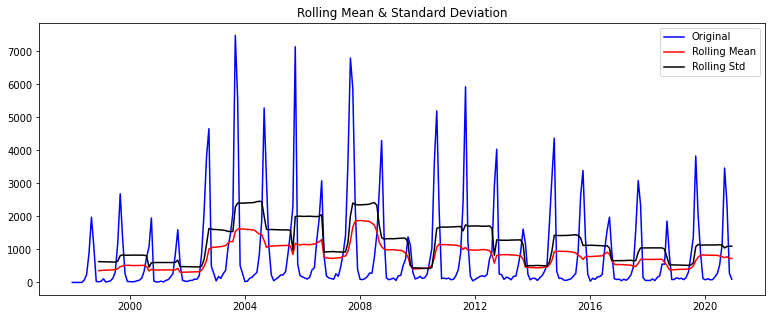

Results of Dickey-Fuller Test:
ADF                             -3.320669
P-value                          0.013979
#Lags Used                      13.000000
Number of Observations Used    262.000000
Critical Value (1%)             -3.455558
Critical Value (5%)             -2.872636
Critical Value (10%)            -2.572683
dtype: float64


In [34]:
#Testando se os dados de treino são estacionários - Minas Gerais
test_stationarity(base_MG['number'])

P-value menor do que 0.05, característica de série estacionária.

In [38]:
'''
Uso do Método por Diferenciação para gerar uma série estacionária
''' 

diff_PA= base_PA['number'].diff(1).fillna(0) 
diff_MA= base_MA['number'].diff(1).fillna(0) 

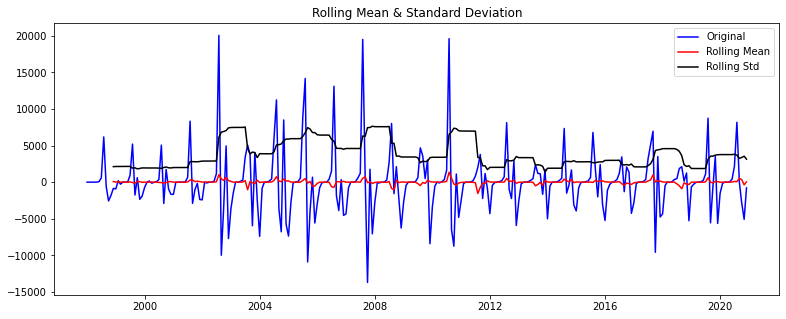

Results of Dickey-Fuller Test:
ADF                           -1.796012e+01
P-value                        2.818856e-30
#Lags Used                     1.000000e+01
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64


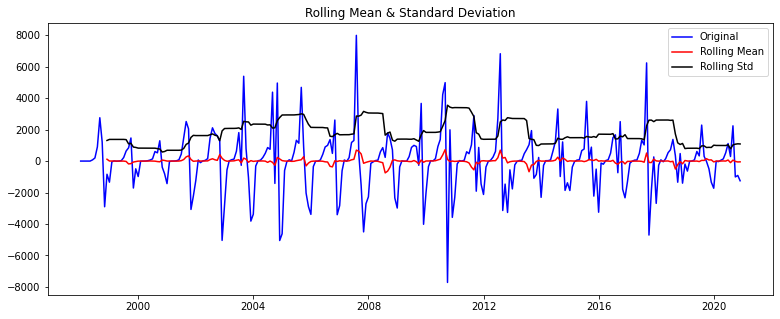

Results of Dickey-Fuller Test:
ADF                           -1.345984e+01
P-value                        3.547718e-25
#Lags Used                     1.000000e+01
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64


In [42]:
# Verificando se a mesma já está estacionária

test_stationarity(diff_PA)

test_stationarity(diff_MA)

Percebe-se que o P-value ficou abaixo de 0.05 e abaixo do valor crítico de 1%, dessa forma a série está estacionária com 99% de confiança. Somente uma diferenciação já deixa a série estacionária.

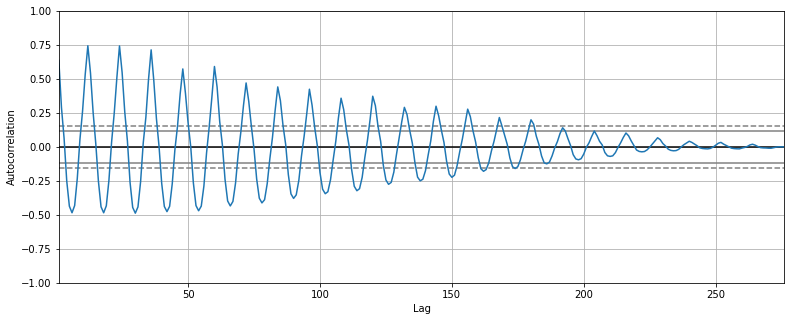

In [44]:
# Verificando Autocorrelação
from pandas.plotting import autocorrelation_plot

# autocorrelation plot 
autocorrelation_plot(base_PA['number'])
plt.show()

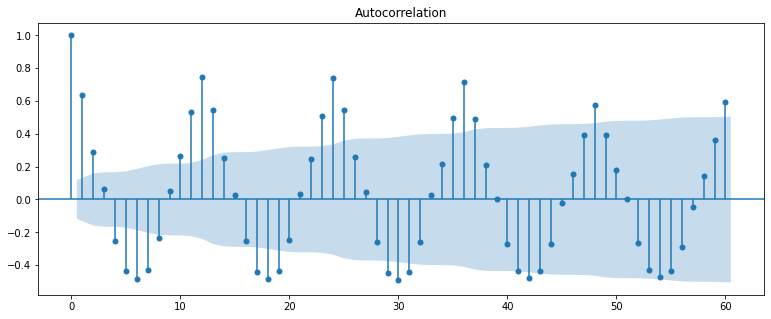

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(base_PA['number'], lags=60)
plt.show()

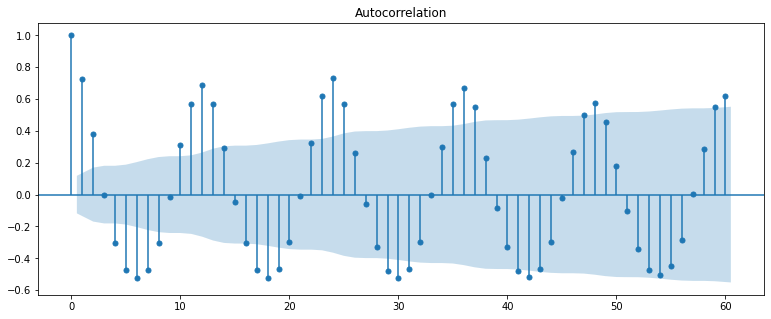

In [46]:
plot_acf(base_MA['number'], lags=60)
plt.show()

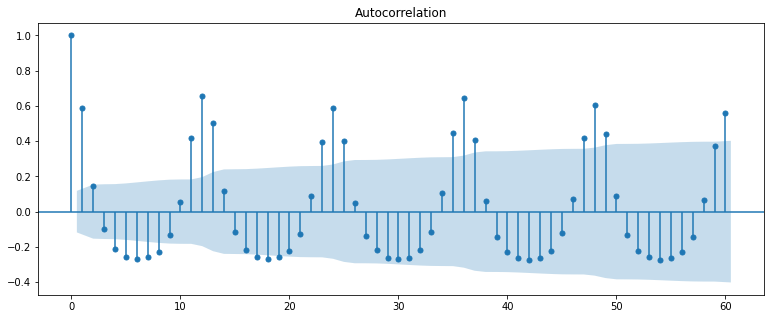

In [47]:
plot_acf(base_MG['number'], lags=60)
plt.show()

## ARIMA

Após tornar a série estacionária, é aplicado o modelo ARIMA para previsão. ARIMA é composto por 3 termos (Auto-Regressão + Integrado + Média Móvel) e estes componentes são representados pelos parâmetros **p**, **d** e **q**.

Para descobrir a melhor combinação de parâmetros, será utilizada a biblioteca **pmdarima**. Através da função auto_arima, ele utiliza pontuação AIC para descobrir o melhor modelo preditivo.

O modelo arima contém alguns parâmetros

**ARIMA(p,d,q)**
- **p**: O número de lags que foram devem ser incluídos no modelo.
- **d**: O número de vezes que as observações serão diferenciadas.
- **q**: O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

### Separando base de treino e teste

In [50]:
train_data_PA = base_PA['number'].loc['1998-01-01':'2019-12-01']
train_data_MA = base_MA['number'].loc['1998-01-01':'2019-12-01']
train_data_MG = base_MG['number'].loc['1998-01-01':'2019-12-01']

In [51]:
test_data_PA = base_PA['number'].loc['2020-01-01':'2020-12-01']
test_data_MA = base_MA['number'].loc['2020-01-01':'2020-12-01']
test_data_MG = base_MG['number'].loc['2020-01-01':'2020-12-01']

### Aplicando PMDARIMA

In [52]:
from pmdarima import auto_arima


model_PA = auto_arima(base_PA['number'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,
                   start_P=0,seasonal=True,d=1,D=1,trace=True,
                   error_action='ignore',suppress_warnings=True,stepwise=True)

model_PA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5078.579, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4964.001, Time=0.94 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4907.317, Time=1.65 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5015.054, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4900.146, Time=1.59 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4923.237, Time=1.05 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4883.330, Time=5.65 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4888.298, Time=5.61 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=4884.549, Time=12.67 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=8.94 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=4946.233, Time=1.75 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=4861.996, Time=7.23 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4867.451, Time=5.79 sec
 ARIMA(1,1,1)(2,1,0)[12]    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  276
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood               -2423.572
Date:                                 Tue, 23 Mar 2021   AIC                           4861.144
Time:                                         22:27:54   BIC                           4886.149
Sample:                                              0   HQIC                          4871.193
                                                 - 276                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3637      0.070      5.202      0.000       0.227       0.501
ma.L1         -0.9591      0.023    -41.735      0.000      -1.004      -0.914
ar.S.L12      -1.0229      0.130     -7.844      0.000      -1.279      -0.767
ar.S.L24      -0.4239      0.060     -7.094      0.000      -0.541      -0.307
ma.S.L12       0.2704      0.147      1.845      0.065      -0.017       0.558
ma.S.L24      -0.1701      0.088     -1.927      0.054      -0.343       0.003
sigma2      5.839e+06   2.46e+05     23.784      0.000    5.36e+06    6.32e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               677.50
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.73
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# Treino do modelo
model_PA.fit(train_data_PA)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [54]:
#Maranhão
model_MA = auto_arima(base_MA['number'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,
                   start_P=0,seasonal=True,d=1,D=1,trace=True,
                   error_action='ignore',suppress_warnings=True,stepwise=True)

model_MA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4728.026, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4605.161, Time=0.93 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4570.906, Time=1.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4707.281, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4568.427, Time=2.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4594.668, Time=1.53 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=7.71 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4569.518, Time=9.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4570.059, Time=5.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4576.853, Time=5.31 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=12.21 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4598.890, Time=1.52 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=3.74 sec
 ARIMA(0,1,2)(1,1,1)[12]             :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  276
Model:             SARIMAX(1, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -2260.578
Date:                              Tue, 23 Mar 2021   AIC                           4535.157
Time:                                      22:32:48   BIC                           4560.162
Sample:                                           0   HQIC                          4545.206
                                              - 276                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4010      0.114      3.520      0.000       0.178       0.624
ma.L1         -0.9021      0.121     -7.450      0.000      -1.139      -0.665
ma.L2          0.1534      0.102      1.505      0.132      -0.046       0.353
ma.L3         -0.2265      0.073     -3.111      0.002      -0.369      -0.084
ar.S.L12      -0.2098      0.070     -3.003      0.003      -0.347      -0.073
ma.S.L12      -0.6135      0.055    -11.170      0.000      -0.721      -0.506
sigma2      1.774e+06   8.94e+04     19.849      0.000     1.6e+06    1.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               705.31
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.17
Prob(H) (two-sided):                  0.54   Kurtosis:                        10.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
# Treino do modelo
model_MA.fit(train_data_MA)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [56]:
#MInas Gerais
model_MG = auto_arima(base_MG['number'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,
                   start_P=0,seasonal=True,d=1,D=1,trace=True,
                   error_action='ignore',suppress_warnings=True,stepwise=True)

model_MG.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4492.202, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4394.600, Time=1.67 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.61 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4456.082, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4347.476, Time=3.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.39 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4369.915, Time=2.64 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4334.129, Time=5.18 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4383.068, Time=2.35 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=11.53 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=5.29 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4328.639, Time=4.82 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4377.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  276
Model:             SARIMAX(6, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2150.928
Date:                            Tue, 23 Mar 2021   AIC                           4319.855
Time:                                    22:36:26   BIC                           4352.005
Sample:                                         0   HQIC                          4332.775
                                            - 276                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4786      0.038    -12.762      0.000      -0.552      -0.405
ar.L2         -0.4044      0.057     -7.083      0.000      -0.516      -0.292
ar.L3         -0.3115      0.094     -3.299      0.001      -0.497      -0.126
ar.L4         -0.2547      0.106     -2.409      0.016      -0.462      -0.047
ar.L5         -0.1948      0.115     -1.699      0.089      -0.419       0.030
ar.L6         -0.1136      0.122     -0.930      0.352      -0.353       0.126
ar.S.L12      -0.6642      0.028    -23.461      0.000      -0.720      -0.609
ar.S.L24      -0.4118      0.033    -12.503      0.000      -0.476      -0.347
sigma2      7.316e+05   3.03e+04     24.136      0.000    6.72e+05    7.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               787.26
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# Treino do modelo
model_MG.fit(train_data_MG)

ARIMA(order=(6, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

## Teste

In [62]:
# Pará
prediction_PA = pd.DataFrame(model_PA.predict(n_periods = 12),index=test_data_PA.index)
prediction_PA.columns = ['predicted_numbers']
prediction_PA

,predicted_numbers
data,
2020-01-01,-477.780124
2020-02-01,-680.745100
2020-03-01,-595.676095
2020-04-01,-558.033043
2020-05-01,-476.847414
2020-06-01,-150.776682
2020-07-01,1247.489089
2020-08-01,4866.818223
2020-09-01,7081.341113


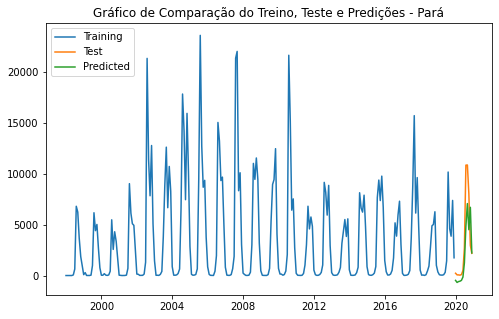

In [69]:
# Gráfico das predições - Pará

plt.figure(figsize=(8,5))
plt.plot(train_data_PA,label="Training")
plt.plot(test_data_PA,label="Test")
plt.plot(prediction_PA,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições - Pará')
plt.show()

In [70]:
# Maranhão

prediction_MA = pd.DataFrame(model_MA.predict(n_periods = 12),index=test_data_MA.index)
prediction_MA.columns = ['predicted_numbers']
prediction_MA

,predicted_numbers
data,
2020-01-01,302.715298
2020-02-01,6.649521
2020-03-01,112.068973
2020-04-01,155.420223
2020-05-01,262.719508
2020-06-01,823.618095
2020-07-01,1748.655622
2020-08-01,3722.453786
2020-09-01,4975.203141


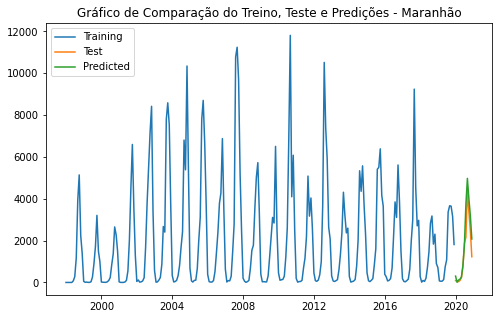

In [71]:
# Gráfico das predições - Maranhão

plt.figure(figsize=(8,5))
plt.plot(train_data_MA,label="Training")
plt.plot(test_data_MA,label="Test")
plt.plot(prediction_MA,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições - Maranhão')
plt.show()

In [66]:
# Minas Gerais
prediction_MG = pd.DataFrame(model_MG.predict(n_periods = 12),index=test_data_MA.index)
prediction_MG.columns = ['predicted_numbers']
prediction_MG

,predicted_numbers
data,
2020-01-01,374.688432
2020-02-01,454.598413
2020-03-01,572.870299
2020-04-01,661.409362
2020-05-01,686.977175
2020-06-01,756.410840
2020-07-01,1037.998374
2020-08-01,1695.994130
2020-09-01,3477.798921


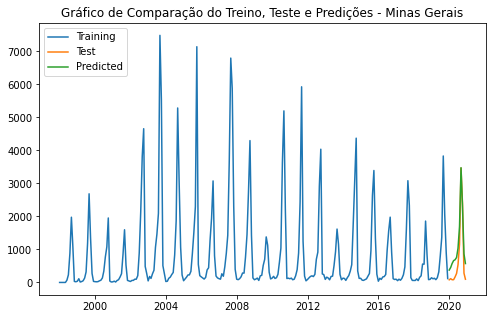

In [72]:
# Gráfico das predições - Minas Gerais

plt.figure(figsize=(8,5))
plt.plot(train_data_MG,label="Training")
plt.plot(test_data_MG,label="Test")
plt.plot(prediction_MG,label="Predicted")
plt.legend(loc = 'upper left')
plt.title('Gráfico de Comparação do Treino, Teste e Predições - Minas Gerais')
plt.show()

In [73]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error

rmse_PA = sqrt(mean_squared_error(test_data_PA, prediction_PA))
print('Test RMSE - Pará: %.3f' % rmse_PA)

rmse_MA = sqrt(mean_squared_error(test_data_MA, prediction_MA))
print('Test RMSE - Maranhão: %.3f' % rmse_MA)

rmse_MG = sqrt(mean_squared_error(test_data_MG, prediction_MG))
print('Test RMSE - Minas Gerais: %.3f' % rmse_MG)

Test RMSE - Pará: 2607.427
Test RMSE - Maranhão: 611.176
Test RMSE - Minas Gerais: 447.660
